In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('salinityTempC.csv')
df = df[np.isfinite(df['Salinity'])]
df = df[np.isfinite(df['TempC'])]
df = df[:10]
df.shape

(10, 3)

In [3]:
df.tail()

,Unnamed: 0,Salinity,TempC
5,5,33.431,10.45
6,6,33.440,10.45
7,7,33.424,10.24
8,8,33.420,10.06
9,9,33.494,9.86


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[['Salinity']],df.TempC,train_size=0.95)

In [5]:
x_train.head()

,Salinity
4,33.421
7,33.424
9,33.494
1,33.440
3,33.420


In [6]:
y_train.head()

4    10.45
7    10.24
9     9.86
1    10.46
3    10.45
Name: TempC, dtype: float64

In [7]:
#convert to numpy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

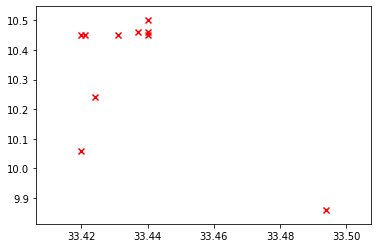

In [8]:
plot.scatter(df['Salinity'], df['TempC'],marker='x',color='red')

In [9]:
def error(x, y, theta):
    sum = 0
    trainLen = len(x)
    for i in range(0,trainLen):
        sum = sum + (( theta[0] + theta[1]*x[i][0]) - y[i])**2
    return sum/(2*trainLen)

In [10]:
error(x_train,y_train,[0,0])

53.33119444444444

In [11]:
# def gd(x, y, theta, alpha, iterations):
#     sumM = 0
#     sumB = 0
#     trainLen = len(x)
#     for i in range(0,trainLen):
#         sumB = sumB + ((theta[0] + theta[1]*x[i][0]) - y[i])
#         sumM = sumM + ((theta[0] + theta[1]*x[i][0]) - y[i])*x[i][0]
            
#     theta[0] = theta[0] - alpha/trainLen * sumB
#     theta[1] = theta[1] - alpha/trainLen * sumM
#     return [theta[0],theta[1]]

In [12]:
def gd(x,y,theta,alpha,iter):
    trainLen = len(x)
    for i in range(0,iter):
        sumTheta0 = 0
        sumTheta1 = 0
        for j in range(0,trainLen):
            sumTheta0 = sumTheta0 + ((theta[0] + theta[1]*x[j][0]) - y[j])
            sumTheta1 = sumTheta1 + ((theta[0] + theta[1]*x[j][0]) - y[j])*x[j][0]
#             print('x: {}, y: {}'.format(x[j][0], y[j]))
#             print('sumthing theta0: {}, sumthing theta1: {}'.format(((theta[0] + theta[1]*x[j][0]) - y[j]), ((theta[0] + theta[1]*x[j][0]) - y[j])*x[j][0]))
#             print('sumTheta0: {}, sumTheta1: {}\n'.format(sumTheta0, sumTheta1))
        theta[0] = theta[0] - (alpha/trainLen * sumTheta0)
        theta[1] = theta[1] - (alpha/trainLen * sumTheta1)
        print(error(x,y,theta))
        
    return [theta[0], theta[1]]

In [13]:
theta = [0,0]
alpha = 0.001
theta = gd(x_train,y_train, theta, alpha, 5)

0.7782685788460475
0.03420586934693672
0.02367116919591593
0.023522015218278437
0.023519903436637495


In [14]:
theta

[0.009228153487550659, 0.3085412123168069]

In [15]:
def prediction(x, theta):
    pred = []
    testLen = len(x)
    for i in range(0,testLen):
        pred.append(theta[0] + theta[1]*x[i][0])
    return pred

In [16]:
pred = prediction(x_test, theta)
len(pred)

1

In [17]:
pred[0]


10.326846293361573

In [18]:
y_test[0]

10.45

In [19]:
rmes_error = mean_squared_error(y_test,pred)
rmes_error

0.015166835458783563

In [20]:
error(x_test,y_test,theta)

0.007583417729391782